In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import scipy
from scipy import stats

In [198]:
# Dimention number
N = 2

# Target alpha
alpha = 0.9

# Generation of random covariace matrix
np.random.seed(2)
A = np.random.rand(N, N)
CovM = np.dot(A, A.transpose())
# Generate some points
X = stats.multivariate_normal.rvs(mean=np.zeros(N), cov=CovM, size=1000)

<ipython-input-197-f4342752e8ec>:34: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  e = Ellipse(tuple(np.mean(X, axis=0)),


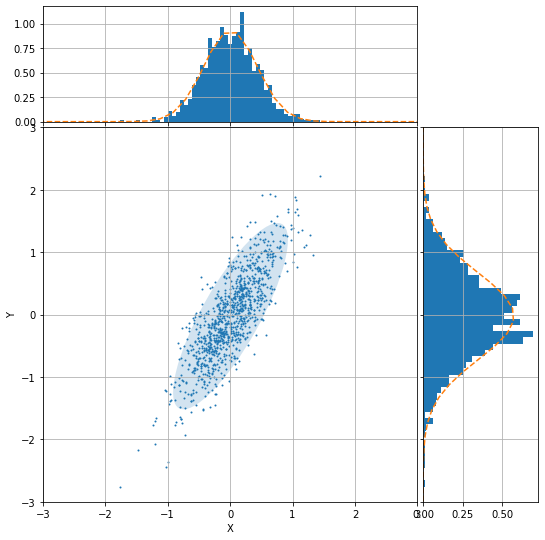

In [197]:
# Some pyplot code
fig = plt.figure(figsize=(8, 8))
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]
ax = fig.add_axes(rect_scatter)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Code for side plots
n, bins, patches = ax_histx.hist(X.T[0], bins=50, density=True)
bins = np.linspace(-5, 5, num=50)
ax_histx.grid()
ax_histx.plot(bins, stats.norm.pdf(bins, loc=np.mean(X.T[0]), scale=np.std(X.T[0])), '--')
n, bins, patches = ax_histy.hist(X.T[1], bins=50, orientation='horizontal', density=True)
bins = np.linspace(-5, 5, num=50)
ax_histy.grid()
ax_histy.plot(stats.norm.pdf(bins, loc=np.mean(X.T[1]), scale=np.std(X.T[1])), 
              bins, '--')

# Scatter main points
ax.scatter(X[:, 0], X[:, 1], alpha=1, s=1)
# Calculate eigenvectors & eigenvalues
eig = np.linalg.eig(np.cov(X.T))
# Width and height here are square-rooted eigenvalues
# The angle is calculated based on first eigenvector angle
e = Ellipse(tuple(np.mean(X, axis=0)), 
            2*stats.chi2.ppf(alpha, 2)**0.5 * eig[0][0]**0.5,
            2*stats.chi2.ppf(alpha, 2)**0.5 * eig[0][1]**0.5,
            -180 * np.arctan(eig[1][0][1] / eig[1][0][0]) / np.pi,
            label=f'{alpha}% confidence level')
e.set_clip_box(ax.bbox)
e.set_alpha(0.2)
ax.add_patch(e)
ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

# Sanity check

Check that points in ellipse really makes alpha share

In [175]:
X_m = X @ np.linalg.inv(eig[1].T) / (eig[0]) ** 0.5
share = np.mean(np.einsum("ji,ji->j", X_m, X_m) <= stats.chi2.ppf(alpha, N))
print("Target share: ", alpha)
print("Real share: ", share)

Target share:  0.9
Real share:  0.893


# Sanity check for real examples

In [204]:
N = 2
alpha = 0.95
np.random.seed(2)
A = np.random.rand(N, N)
CovM = np.dot(A, A.transpose())

X = stats.multivariate_normal.rvs(mean=np.zeros(N), cov=CovM, size=1000)

<ipython-input-205-213d4438269a>:37: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  e = Ellipse(tuple(np.mean(X, axis=0)),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


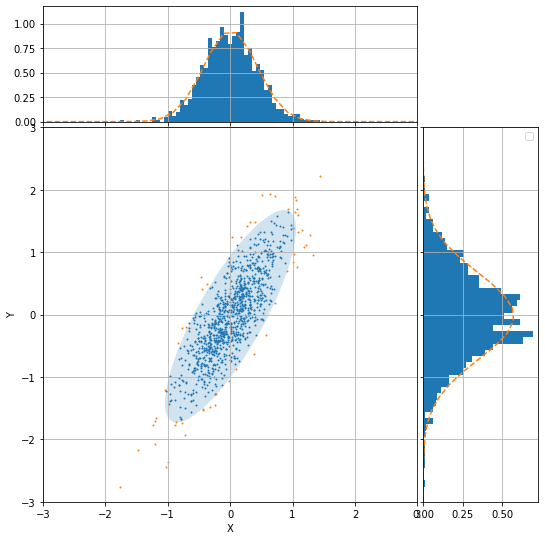

In [205]:
fig = plt.figure(figsize=(8, 8))
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]
ax = fig.add_axes(rect_scatter)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

n, bins, patches = ax_histx.hist(X.T[0], bins=50, density=True)
bins = np.linspace(-5, 5, num=50)
ax_histx.grid()
ax_histx.plot(bins, stats.norm.pdf(bins, loc=np.mean(X.T[0]), scale=np.std(X.T[0])), '--')
n, bins, patches = ax_histy.hist(X.T[1], bins=50, orientation='horizontal', density=True)
bins = np.linspace(-5, 5, num=50)
ax_histy.grid()
ax_histy.plot(stats.norm.pdf(bins, loc=np.mean(X.T[1]), scale=np.std(X.T[1])), 
              bins, '--')


X_m = X @ np.linalg.inv(eig[1].T) / (eig[0]) ** 0.5
select = np.einsum("ji,ji->j", X_m, X_m) <= stats.chi2.ppf(alpha, N)
ax.scatter(X[select, 0], X[select, 1], alpha=1, s=1)
ax.scatter(X[~select, 0], X[~select, 1], alpha=1, s=1)

eig = np.linalg.eig(np.cov(X.T))
e = Ellipse(tuple(np.mean(X, axis=0)), 
            2*stats.chi2.ppf(alpha, 2)**0.5 * eig[0][0]**0.5,
            2*stats.chi2.ppf(alpha, 2)**0.5 * eig[0][1]**0.5,
            -180 * np.arctan(eig[1][0][1] / eig[1][0][0]) / np.pi,
            label='95% confidence level')
e.set_clip_box(ax.bbox)
e.set_alpha(0.2)
ax.add_patch(e)
ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.legend()
plt.show()

## Here you can see that selected objects excatly matches the ellipse 

# The code works for 3d too

In [191]:
N = 3
alpha = 0.9
np.random.seed(2)
A = np.random.rand(N, N)
CovM = np.dot(A, A.transpose())

X = stats.multivariate_normal.rvs(mean=np.zeros(N), cov=CovM, size=1000)

In [192]:
eig = np.linalg.eig(np.cov(X.T))
X_m = X @ np.linalg.inv(eig[1].T) / (eig[0]) ** 0.5
share = np.mean((X_m * X_m).sum(axis=1) <= stats.chi2.ppf(alpha, N))
print("Target share: ", alpha)
print("Real share: ", share)

Target share:  0.9
Real share:  0.894
